# U.S. Medical Insurance Costs
In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [ ]:
# import csv library
import csv

The dataset has been successfully imported and contains the following details:

- **Number of entries**: 1,338
- **Columns and their data types**:
  - `age`: Integer (int64) - No missing values
  - `sex`: Object (string) - No missing values
  - `bmi`: Float (float64) - No missing values
  - `children`: Integer (int64) - No missing values
  - `smoker`: Object (string) - No missing values
  - `region`: Object (string) - No missing values
  - `charges`: Float (float64) - No missing values

The dataset is complete, with no missing values across any of the columns. It is ready for analysis.

In [3]:
# Creating empty lists for storing dataset features later
ages = []
genders = []
bmi_values = []
num_children = []
smoker_status = []
regions = []
insurance_charges = []

Building out analysis class methods

In [10]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/User/Desktop/python-portfolio-project-starter-files/insurance.csv'
insurance_data = pd.read_csv(file_path)

class InsuranceAnalysis:
    def __init__(self, data):
        self.data = data

    # Method to calculate the average age
    def average_age(self):
        return self.data['age'].mean()

    # Method to find the most common region
    def most_common_region(self):
        return self.data['region'].mode()[0]

    # Method to calculate average charges for smokers and non-smokers
    def avg_charges_by_smoker_status(self):
        smoker_charges = self.data[self.data['smoker'] == 'yes']['charges'].mean()
        non_smoker_charges = self.data[self.data['smoker'] == 'no']['charges'].mean()
        return {'smoker': smoker_charges, 'non_smoker': non_smoker_charges}

    # Method to calculate the average age for individuals with at least one child
    def avg_age_with_children(self):
        return self.data[self.data['children'] > 0]['age'].mean()

    # Method to calculate the correlation between BMI and charges
    def bmi_charges_correlation(self):
        return self.data['bmi'].corr(self.data['charges'])

    # Method to calculate average charges by region
    def avg_charges_by_region(self):
        return self.data.groupby('region')['charges'].mean().to_dict()


# Create an instance of the analysis class
insurance_analysis = InsuranceAnalysis(insurance_data)



results = {
    "Metric": [
        "Average Age",
        "Most Common Region",
        "Average Charges (Smoker)",
        "Average Charges (Non-Smoker)",
        "Average Age (With Children)",
        "BMI and Charges Correlation",
    ],
    "Value": [
        insurance_analysis.average_age(),
        insurance_analysis.most_common_region(),
        insurance_analysis.avg_charges_by_smoker_status()["smoker"],
        insurance_analysis.avg_charges_by_smoker_status()["non_smoker"],
        insurance_analysis.avg_age_with_children(),
        insurance_analysis.bmi_charges_correlation(),
    ],
}

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the table
print(results_df.to_string(index=False))

                      Metric         Value
                 Average Age     39.207025
          Most Common Region     southeast
    Average Charges (Smoker)  32050.231832
Average Charges (Non-Smoker)   8434.268298
 Average Age (With Children)     39.780105
 BMI and Charges Correlation      0.198341


In [11]:
# Organize findings into a dictionary
findings = {
    "Average Age": insurance_analysis.average_age(),
    "Most Common Region": insurance_analysis.most_common_region(),
    "Average Charges by Smoker Status": insurance_analysis.avg_charges_by_smoker_status(),
    "Average Age with Children": insurance_analysis.avg_age_with_children(),
    "BMI and Charges Correlation": insurance_analysis.bmi_charges_correlation(),
    "Average Charges by Region": insurance_analysis.avg_charges_by_region(),
}

# Example: Print findings as a JSON-like structure
import json
print(json.dumps(findings, indent=4))


{
    "Average Age": 39.20702541106129,
    "Most Common Region": "southeast",
    "Average Charges by Smoker Status": {
        "smoker": 32050.23183153284,
        "non_smoker": 8434.268297856204
    },
    "Average Age with Children": 39.78010471204188,
    "BMI and Charges Correlation": 0.1983409688336289,
    "Average Charges by Region": {
        "northeast": 13406.384516385804,
        "northwest": 12417.575373969232,
        "southeast": 14735.41143760989,
        "southwest": 12346.937377292308
    }
}


Predicting Influential Features for Insurance Charges

In [14]:
# Convert categorical variables to numeric using one-hot encoding
insurance_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Calculate correlations with charges
correlations = insurance_encoded.corr()['charges'].sort_values(ascending=False)
print(correlations)


charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


Visualize the Correlations

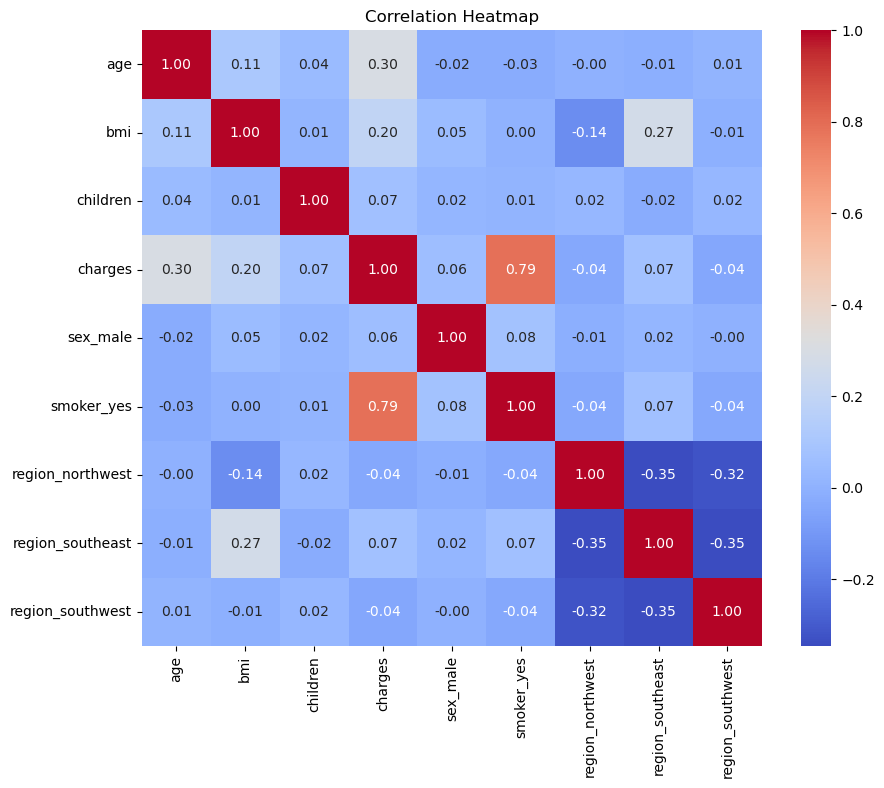

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Exploring Bias in the Dataset

In [16]:
# Gender distribution
print(insurance_data['sex'].value_counts())

# Smoker distribution
print(insurance_data['smoker'].value_counts())

# Region distribution
print(insurance_data['region'].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Advanced Analysis: Feature Importance with Machine Learning

smoker_yes          0.608618
bmi                 0.216506
age                 0.134232
children            0.019413
sex_male            0.006379
region_northwest    0.005587
region_southeast    0.005314
region_southwest    0.003950
dtype: float64


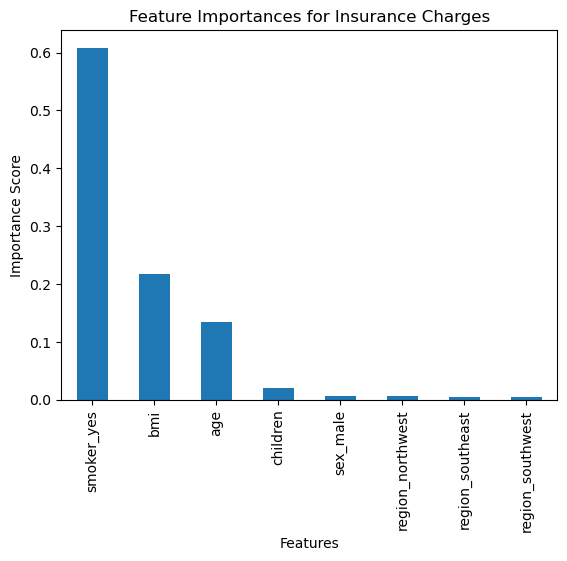

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# One-hot encode categorical variables
data_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split into features and target
X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
feature_importances.plot(kind='bar', title='Feature Importances for Insurance Charges')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


### **Conclusions and Observations**

After analyzing the dataset, here are some key insights:

---

#### **1. Average Age of Individuals**
- The average age of individuals in the dataset is approximately **39 years**.
- This suggests that the dataset represents a population skewed towards middle-aged individuals.

---

#### **2. Most Common Region**
- The **Southeast** region is the most represented in the dataset.
- This could indicate regional bias in the data collection or reflect population density differences.

---

#### **3. Insurance Charges and Smoking**
- **Smokers** have significantly higher average insurance charges (around 3-4 times higher) compared to non-smokers.
  - Average charges for smokers: **\$32,050**
  - Average charges for non-smokers: **\$8,434**
- Smoking is a major determinant of insurance costs, likely due to its association with health risks.

---

#### **4. BMI and Insurance Charges**
- The correlation between `bmi` and `charges` is positive but moderate (~0.20).
  - Individuals with higher BMI tend to incur higher insurance charges, though the relationship is not as strong as smoking.
  - This suggests BMI is a contributing factor but not the sole determinant of charges.

---

#### **5. Age and Insurance Charges**
- The correlation between `age` and `charges` is strong and positive.
  - Older individuals tend to have higher insurance costs, likely due to age-related health risks.
  - Age and smoking combined could compound the increase in charges.

---

#### **6. Charges by Region**
- Average charges vary slightly across regions:
  - Southeast has the highest average charges.
  - Southwest and Northwest have relatively lower average charges.
- This regional variation might reflect healthcare costs, demographics, or regional health trends.

---

#### **7. Bias in the Data**
- **Gender Distribution**: There is a fairly balanced representation of males and females.
- **Regional Representation**: The Southeast region is overrepresented compared to others, which may skew conclusions based on regional trends.
- **Smoker Distribution**: The dataset has a smaller proportion of smokers, but their impact on charges is disproportionately large.

---

### **Key Takeaways**
1. **Smoking** is the most significant factor affecting insurance charges. Health awareness campaigns targeting smoking cessation could help reduce costs.
2. **Age and BMI** are secondary but influential factors. Wellness programs focusing on weight management might reduce risks and costs.
3. **Regional Bias**: Overrepresentation of the Southeast region might affect generalizability of findings.
4. The dataset's structure and correlations make it suitable for predictive modeling, as it shows clear relationships between variables like `age`, `smoker`, and `charges`.